In [1]:
import keras 
import os
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
from matplotlib import image,pyplot
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
import keras
from keras import layers
from keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [2]:
img=image.load_img("C:/Users/Annamalai/desktop/others/data/train/0/0.jpg")

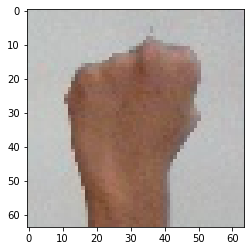

In [3]:
plt.imshow(img)

In [6]:
shapy=cv2.imread("C:/Users/Annamalai/desktop/others/data/train/0/0.jpg")
shapy.shape

(64, 64, 3)

In [2]:
x,y=[],[]
path="C:/Users/Annamalai/Desktop/others/data/test"
loc=os.listdir(path)
for i in os.listdir(path):
        for j in os.listdir(path+'/'+i):
                im= Image.open(path+'/'+i+'/'+j)
                im=im.resize((64,64),Image.ANTIALIAS)
                im=np.array(im)
                
                x.append(im)
                y.append(loc.index(i))
x=np.array(x)
y=to_categorical(y,num_classes=len(loc))

In [3]:

x.shape,y.shape

((1650, 64, 64, 3), (1650, 3))

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,shuffle=True,random_state=True)
x_t,x_val,y_t,y_val=train_test_split(x_train,y_train,train_size=0.80,shuffle=True,random_state=True)

In [8]:
model=Sequential()
model.add(keras.Input(shape=(64,64,3)))
model.add(layers.Conv2D(34,5,strides=5,activation="relu"))
model.add(layers.Conv2D(64,3,strides=3,activation="relu"))
model.add(layers.MaxPooling2D(3))
model.summary()
model.add(layers.GlobalMaxPooling2D())
model.add(Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(x_t,y_t,validation_data=(x_val,y_val),epochs = 50,batch_size =100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 12, 12, 34)        2584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          19648     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 22,232
Trainable params: 22,232
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 2s 91ms/step - loss: 5.0779 - accuracy: 0.4000 - val_loss: 0.7771 - val_accuracy: 0.7008
Epoch 2/50
11/11 [==============================] - 1s 46ms/step - loss: 0.6089 - accuracy: 0.7165 - val_loss: 0.3574 - val_accuracy: 0.9015
Epoch 3/50
11/11 [==============================] - 0s 34ms/step - loss: 0.2904 - accuracy: 0.9152

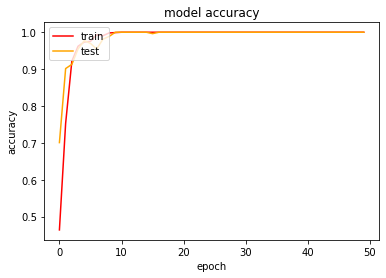

In [9]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='orange')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

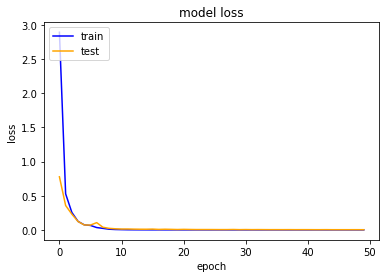

In [10]:
plt.plot(history.history['loss'],color='b')
plt.plot(history.history['val_loss'],color='orange')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [11]:
model.save('c:/Users/annamalai/desktop/others/data/volume_up_new_model.h5')

In [12]:
predict_val=model.predict(x_test)
t=np.argmax(predict_val,axis=-1)

In [13]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(t,np.argmax(y_test,axis=1))

array([[104,   0,   0],
       [  2, 113,   0],
       [  0,   0, 111]], dtype=int64)

In [14]:
accuracy_score(t,np.argmax(y_test,axis=1))

0.9939393939393939